In [1]:
import sys
import os
import numpy as np
import multiprocessing
import dill
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from util_functions import *
from uncertainty_analysis import *
from sim_helper_functions import *

In [3]:
'.asdf'.split('.')

['', 'asdf']

In [17]:
base_folder = '/home/aaj54/group-testing/notebooks/pnas_paper_figs/virtual_contour_plot_sims_1621397587/'


def get_sim_output_fnames():
    return [base_folder + fname for fname in os.listdir(base_folder)]


def map_fpath_to_params(fpath):
    fname = fpath.split('/')[-1]
    
    # I got the parameter names / labels mixed up when generating the file names, whoops
    x_variable = 'virtual_pop_size'
    x_val = float(fname.split(x_variable+'_')[1].split('_')[0])
    y_variable = 'virtual_noncompliance'
    y_val = float(fname.split(y_variable+'_')[1].split('.dill')[0])
    
    return y_val, x_val


def get_Y_values():
    return np.linspace(PARAM_BOUNDS['virtual_noncompliance'][0], PARAM_BOUNDS['virtual_noncompliance'][1], 13)

def get_X_values():
    # based on hardcoded values: lb=-1.1, ub = 1.1, npoints=13
    return np.linspace(PARAM_BOUNDS['virtual_pop_size'][0], PARAM_BOUNDS['virtual_pop_size'][1], 13)


from math import log
def load_contour_plot_data():
    sim_fpaths = get_sim_output_fnames()
    sim_results_df = load_sim_output(sim_fpaths)
    sim_params = {'virtual_pop_size': [], 'virtual_noncompliance': []}
    for fpath in sim_fpaths:
#         print(fpath)
        params = map_fpath_to_params(fpath)
        sim_params['virtual_noncompliance'].append(params[0])
        sim_params['virtual_pop_size'].append(params[1])

    assert(len(set(sim_params['virtual_noncompliance'])) == len(set(sim_params['virtual_pop_size'])) == 13)

    Y = get_Y_values()
    X = get_X_values()

    X_val_to_idx = {x_val:idx for idx, x_val in enumerate(X)}
    Y_val_to_idx = {y_val:idx for idx, y_val in enumerate(Y)}

    Z = np.zeros((13, 13))

    for sim_idx in range(sim_results_df.shape[0]):

        x_idx = X_val_to_idx[sim_params['virtual_pop_size'][sim_idx]]
        y_idx = Y_val_to_idx[sim_params['virtual_noncompliance'][sim_idx]]

        Z[x_idx, y_idx] = (sim_results_df.iloc[sim_idx]['res_cornell_inf_50'])
    
    return X, Y, Z



/home/aaj54/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: No contour levels were found within the data range.
  del sys.path[0]


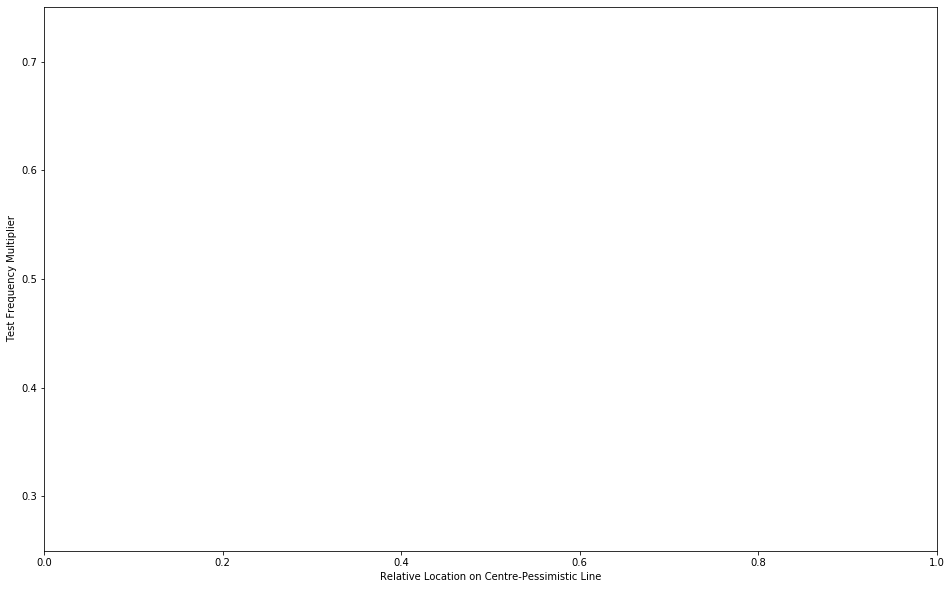

In [18]:
import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline

X,Y,Z = load_contour_plot_data()



plt.figure(figsize=(16,10))
plt.ylabel('Test Frequency Multiplier')
plt.xlabel('Relative Location on Centre-Pessimistic Line')
levels = np.logspace(log(Z.min())/log(10), log(Z.max())/log(10), num=10)
CS = plt.contour(X,Y,Z.T, levels)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()



In [10]:
'/home/aaj54/group-testing/notebooks/pnas_paper_figs/virtual_contour_plot_sims_1621397587/virtual_pop_size_1.0_virtual_noncompliance_0.75.dill'.split('virtual_pop_size_')

['/home/aaj54/group-testing/notebooks/pnas_paper_figs/virtual_contour_plot_sims_1621397587/',
 '1.0_virtual_noncompliance_0.75.dill']

In [20]:
X,Y,Z = load_contour_plot_data()
X,Y,Z

(array([0.        , 0.08333333, 0.16666667, 0.25      , 0.33333333,
        0.41666667, 0.5       , 0.58333333, 0.66666667, 0.75      ,
        0.83333333, 0.91666667, 1.        ]),
 array([0.25      , 0.29166667, 0.33333333, 0.375     , 0.41666667,
        0.45833333, 0.5       , 0.54166667, 0.58333333, 0.625     ,
        0.66666667, 0.70833333, 0.75      ]),
 array([[181.5, 181.5, 181.5, 181.5, 181.5, 181.5, 181.5, 181.5, 181.5,
         181.5, 181.5, 181.5, 181.5],
        [181.5, 181.5, 181.5, 181.5, 181.5, 181.5, 181.5, 181.5, 181.5,
         181.5, 181.5, 181.5, 181.5],
        [181.5, 181.5, 181.5, 181.5, 181.5, 181.5, 181.5, 181.5, 181.5,
         181.5, 181.5, 181.5, 181.5],
        [181.5, 181.5, 181.5, 181.5, 181.5, 181.5, 181.5, 181.5, 181.5,
         181.5, 181.5, 181.5, 181.5],
        [181.5, 181.5, 181.5, 181.5, 181.5, 181.5, 181.5, 181.5, 181.5,
         181.5, 181.5, 181.5, 181.5],
        [181.5, 181.5, 181.5, 181.5, 181.5, 181.5, 181.5, 181.5, 181.5,
         181.5

In [27]:
sim_fpaths = get_sim_output_fnames()
sim_results_df = load_sim_output(sim_fpaths)
sim_results_df[['virtual_noncompliance', 'virtual_pop_size', 'res_cornell_inf_50']]
# sim_results_df.columns

,virtual_noncompliance,virtual_pop_size,res_cornell_inf_50
0,0.750000,1.0,181.5
1,0.666667,1.0,181.5
2,0.583333,1.0,181.5
3,0.625000,1.0,181.5
4,0.708333,1.0,181.5
...,...,...,...
164,0.333333,0.0,181.5
165,0.541667,0.0,181.5
166,0.291667,0.0,181.5
167,0.375000,0.0,181.5


In [22]:
sim_fpaths

['/home/aaj54/group-testing/notebooks/pnas_paper_figs/virtual_contour_plot_sims_1621397587/virtual_pop_size_1.0_virtual_noncompliance_0.75.dill',
 '/home/aaj54/group-testing/notebooks/pnas_paper_figs/virtual_contour_plot_sims_1621397587/virtual_pop_size_1.0_virtual_noncompliance_0.6666666666666666.dill',
 '/home/aaj54/group-testing/notebooks/pnas_paper_figs/virtual_contour_plot_sims_1621397587/virtual_pop_size_1.0_virtual_noncompliance_0.5833333333333333.dill',
 '/home/aaj54/group-testing/notebooks/pnas_paper_figs/virtual_contour_plot_sims_1621397587/virtual_pop_size_1.0_virtual_noncompliance_0.625.dill',
 '/home/aaj54/group-testing/notebooks/pnas_paper_figs/virtual_contour_plot_sims_1621397587/virtual_pop_size_1.0_virtual_noncompliance_0.7083333333333333.dill',
 '/home/aaj54/group-testing/notebooks/pnas_paper_figs/virtual_contour_plot_sims_1621397587/virtual_pop_size_1.0_virtual_noncompliance_0.5416666666666666.dill',
 '/home/aaj54/group-testing/notebooks/pnas_paper_figs/virtual_conto

In [13]:
sim_results_df.shape

(169, 28)

In [35]:
[uncertainty_point, res_inf_matrix, res_hosp_matrix, virtual_inf_matrix, virtual_hosp_matrix] = dill.load(open('/home/aaj54/group-testing/notebooks/pnas_paper_figs/virtual_contour_plot_sims_1621493035/virtual_pop_size_1.0_virtual_noncompliance_0.75.dill','rb'))
res_inf_matrix

[[42, 63, 12, 21, 14, 4, 18, 184],
 [46, 50, 24, 23, 28, 7, 8, 175],
 [30, 38, 9, 12, 16, 4, 19, 225],
 [28, 45, 29, 15, 23, 5, 20, 217],
 [26, 47, 13, 35, 21, 8, 19, 176],
 [23, 45, 21, 35, 16, 6, 9, 187],
 [42, 53, 15, 31, 22, 6, 26, 208],
 [44, 46, 18, 33, 26, 10, 13, 170],
 [34, 62, 12, 25, 19, 8, 16, 175],
 [28, 40, 15, 28, 14, 6, 19, 181],
 [25, 50, 11, 38, 18, 9, 14, 177],
 [40, 67, 16, 21, 23, 8, 16, 217],
 [34, 56, 24, 18, 26, 7, 17, 223],
 [37, 45, 27, 23, 21, 4, 17, 191],
 [41, 54, 17, 18, 16, 6, 21, 169],
 [27, 49, 9, 40, 20, 7, 13, 181],
 [41, 54, 21, 31, 23, 11, 24, 184],
 [38, 49, 14, 27, 19, 6, 12, 150],
 [27, 37, 13, 47, 21, 5, 19, 149],
 [30, 59, 18, 23, 23, 9, 16, 186],
 [33, 57, 25, 24, 23, 7, 23, 194],
 [31, 72, 20, 28, 18, 15, 13, 181],
 [40, 75, 20, 66, 24, 10, 14, 185],
 [48, 51, 13, 38, 24, 6, 26, 199],
 [16, 44, 17, 36, 22, 7, 14, 199],
 [28, 46, 9, 33, 18, 4, 20, 227],
 [41, 57, 16, 13, 25, 5, 20, 168],
 [43, 60, 16, 41, 24, 9, 14, 223],
 [36, 47, 19, 39, 19,

In [36]:
[uncertainty_point, res_inf_matrix, res_hosp_matrix, virtual_inf_matrix, virtual_hosp_matrix] = dill.load(open('/home/aaj54/group-testing/notebooks/pnas_paper_figs/virtual_contour_plot_sims_1621493035/virtual_pop_size_1.0_virtual_noncompliance_0.6666666666666666.dill','rb'))
res_inf_matrix

[[42, 63, 12, 21, 14, 4, 18, 184],
 [46, 50, 24, 23, 28, 7, 8, 175],
 [30, 38, 9, 12, 16, 4, 19, 225],
 [28, 45, 29, 15, 23, 5, 20, 217],
 [26, 47, 13, 35, 21, 8, 19, 176],
 [23, 45, 21, 35, 16, 6, 9, 187],
 [42, 53, 15, 31, 22, 6, 26, 208],
 [44, 46, 18, 33, 26, 10, 13, 170],
 [34, 62, 12, 25, 19, 8, 16, 175],
 [28, 40, 15, 28, 14, 6, 19, 181],
 [25, 50, 11, 38, 18, 9, 14, 177],
 [40, 67, 16, 21, 23, 8, 16, 217],
 [34, 56, 24, 18, 26, 7, 17, 223],
 [37, 45, 27, 23, 21, 4, 17, 191],
 [41, 54, 17, 18, 16, 6, 21, 169],
 [27, 49, 9, 40, 20, 7, 13, 181],
 [41, 54, 21, 31, 23, 11, 24, 184],
 [38, 49, 14, 27, 19, 6, 12, 150],
 [27, 37, 13, 47, 21, 5, 19, 149],
 [30, 59, 18, 23, 23, 9, 16, 186],
 [33, 57, 25, 24, 23, 7, 23, 194],
 [31, 72, 20, 28, 18, 15, 13, 181],
 [40, 75, 20, 66, 24, 10, 14, 185],
 [48, 51, 13, 38, 24, 6, 26, 199],
 [16, 44, 17, 36, 22, 7, 14, 199],
 [28, 46, 9, 33, 18, 4, 20, 227],
 [41, 57, 16, 13, 25, 5, 20, 168],
 [43, 60, 16, 41, 24, 9, 14, 223],
 [36, 47, 19, 39, 19,

In [34]:
point = get_centre_point()
point['virtual_pop_size'] = PARAM_BOUNDS['virtual_pop_size'][0]
point

{'asymp_prob_mult': 1.0,
 'inital_prev_mult': 1.0,
 'R0': 2.5,
 'outside_inf_mult': 1.0,
 'daily_self_report_prob': 0.36,
 'ct_mult': 1.5,
 'ct_testing_ratio': 1.0,
 'test_sensitivity': 0.6000000000000001,
 'test_noncompliance': 0.1,
 'E_time': 2.0,
 'ID_time': 3.0,
 'Sy_time': 12.0,
 'virtual_noncompliance': 0.5,
 'intermittent_non-compliance': 0.5,
 'virtual_r0_mult': 1.2349999999999999,
 'virtual_pop_size': 0}